In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("D:/Freelancer/python/Superstore Sales Dataset/train.csv")
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/6/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [3]:
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [4]:
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [5]:
df['Postal Code'] = df['Postal Code'].fillna(0)   
df.drop_duplicates(inplace = True)   

In [6]:
df['Order Date'] = pd.to_datetime(df['Order Date'],dayfirst = True)
df['Order Month'] = df['Order Date'].dt.month
df['Order Year'] = df['Order Date'].dt.year
df['Order Day'] = df['Order Date'].dt.day

df['Ship Date'] = pd.to_datetime(df['Ship Date'],dayfirst = True)
df['Ship Month'] = df['Ship Date'].dt.month
df['Ship Year'] = df['Ship Date'].dt.year
df['Ship Day'] = df['Ship Date'].dt.day


In [7]:
df.groupby('Category')['Sales'].sum().sort_values(ascending=False)

Category
Technology         827455.8730
Furniture          728658.5757
Office Supplies    705422.3340
Name: Sales, dtype: float64

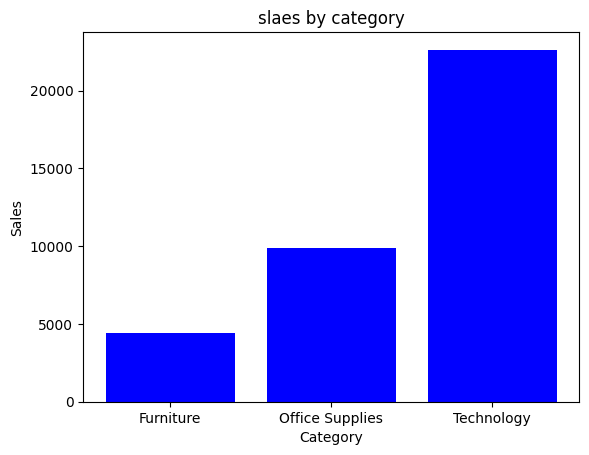

In [8]:

plt.bar(df['Category'], df['Sales'], color='blue')
plt.title("slaes by category")
plt.xlabel("Category")
plt.ylabel("Sales")
plt.show()

In [9]:
df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False)

Sub-Category
Phones         327782.4480
Chairs         322822.7310
Storage        219343.3920
Tables         202810.6280
Binders        200028.7850
Machines       189238.6310
Accessories    164186.7000
Copiers        146248.0940
Bookcases      113813.1987
Appliances     104618.4030
Furnishings     89212.0180
Paper           76828.3040
Supplies        46420.3080
Art             26705.4100
Envelopes       16128.0460
Labels          12347.7260
Fasteners        3001.9600
Name: Sales, dtype: float64

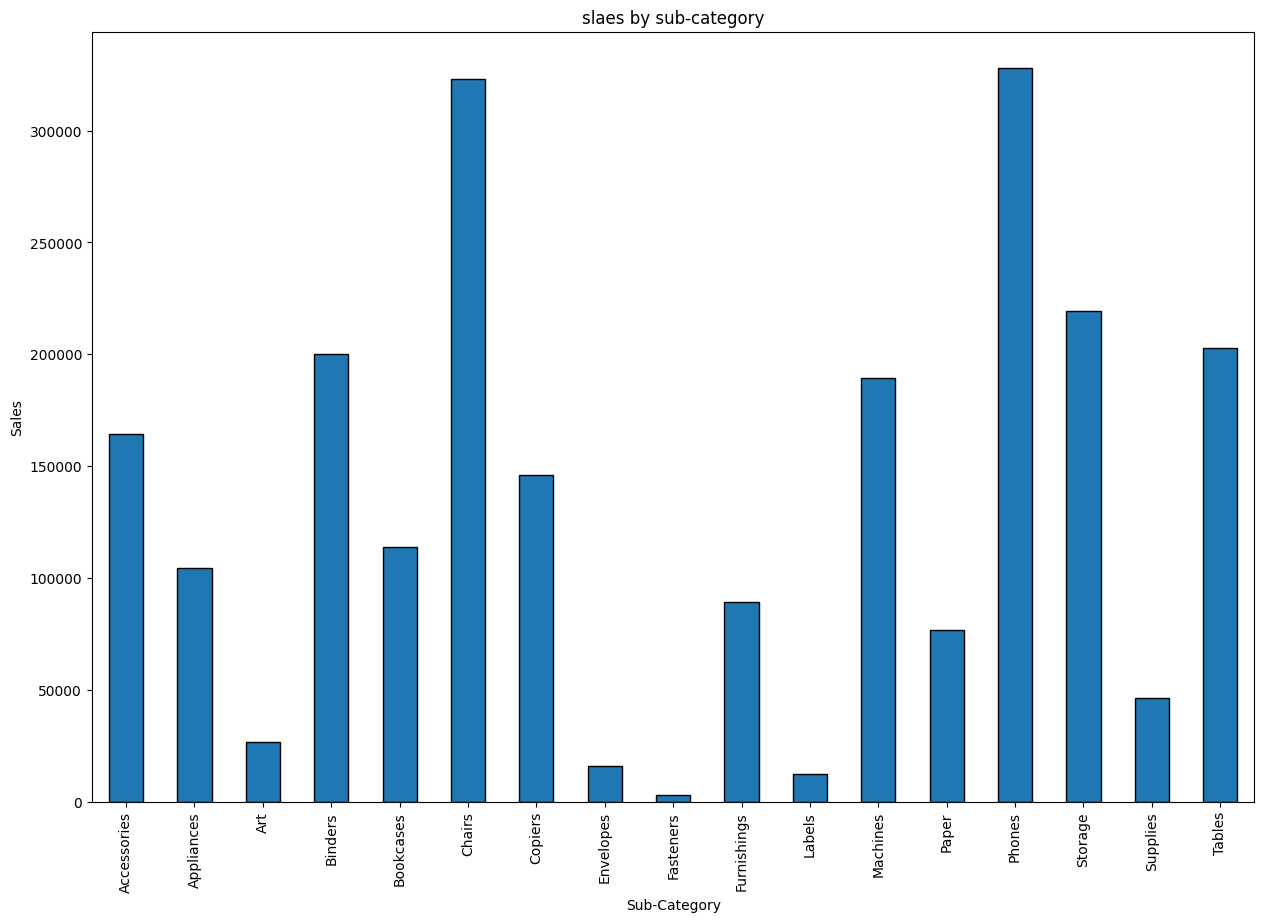

In [10]:
sub_category_sales = df.groupby('Sub-Category')['Sales'].sum()
sub_category_sales.plot(kind='bar', figsize=(15, 10), width=0.5, edgecolor='black')
plt.title("slaes by sub-category")
plt.xlabel("Sub-Category")
plt.ylabel("Sales")
plt.show()

In [11]:
df['Ship Month'] = df['Ship Date'].dt.month
df['Ship Year'] = df['Ship Date'].dt.year
df['Ship Day'] = df['Ship Date'].dt.day

In [12]:
ship_year_sales= df.groupby('Ship Year')['Sales'].sum().sort_values(ascending=False)


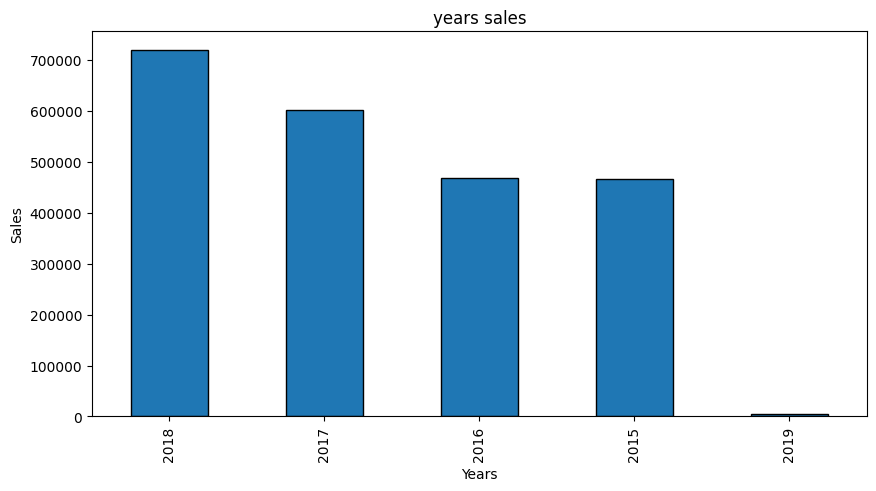

In [13]:
ship_year_sales.plot(kind='bar', figsize=(10, 5), width=0.5, edgecolor='black')
plt.title("years sales")
plt.xlabel("Years")
plt.ylabel("Sales")
plt.show()

In [14]:
category_ship_year = df.groupby(['Category', 'Ship Year'])['Sales'].sum()
category_ship_year


Category         Ship Year
Furniture        2015         152813.7851
                 2016         167542.2234
                 2017         194675.5110
                 2018         210762.6494
                 2019           2864.4068
Office Supplies  2015         145042.5990
                 2016         135732.8360
                 2017         183476.7360
                 2018         239283.0290
                 2019           1887.1340
Technology       2015         169185.4890
                 2016         164027.3290
                 2017         224154.0980
                 2018         269680.8010
                 2019            408.1560
Name: Sales, dtype: float64

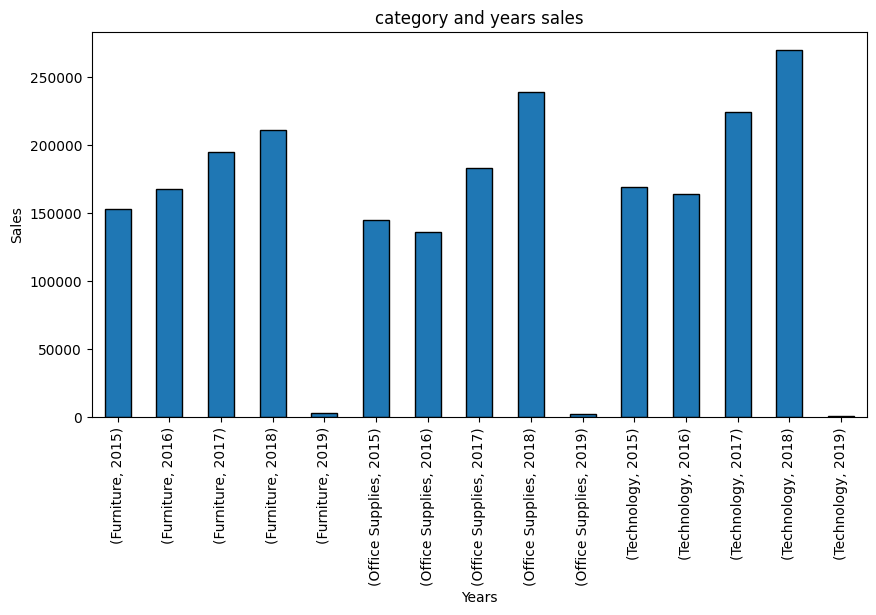

In [15]:
category_ship_year.plot(kind='bar', figsize=(10, 5), width=0.5, edgecolor='black')
plt.title("category and years sales")
plt.xlabel("Years")
plt.ylabel("Sales")
plt.show()

In [16]:
order_ship_year = df.groupby(['Order Date','Ship Year'])['Ship Mode'].count()
order_ship_year


Order Date  Ship Year
2015-01-03  2015          1
2015-01-04  2015          3
2015-01-05  2015          1
2015-01-06  2015          9
2015-01-07  2015          2
                         ..
2018-12-28  2018          2
            2019         17
2018-12-29  2018          1
            2019         11
2018-12-30  2019          7
Name: Ship Mode, Length: 1248, dtype: int64

In [17]:
df.groupby(['Segment','Sub-Category'])['Sales'].sum()


Segment      Sub-Category
Consumer     Accessories      85699.0740
             Appliances       52367.2330
             Art              14062.2560
             Binders         117091.9090
             Bookcases        67949.3970
             Chairs          171174.0960
             Copiers          66539.1340
             Envelopes         7631.5980
             Fasteners         1675.0020
             Furnishings      48724.9500
             Labels            6610.7260
             Machines         79542.8250
             Paper            35599.5680
             Phones          169230.6320
             Storage          98783.2300
             Supplies         25531.0860
             Tables           99847.8150
Corporate    Accessories      46593.0300
             Appliances       34170.3730
             Art               8526.1800
             Binders          50006.9870
             Bookcases        34005.9243
             Chairs           95203.1520
             Copiers          4

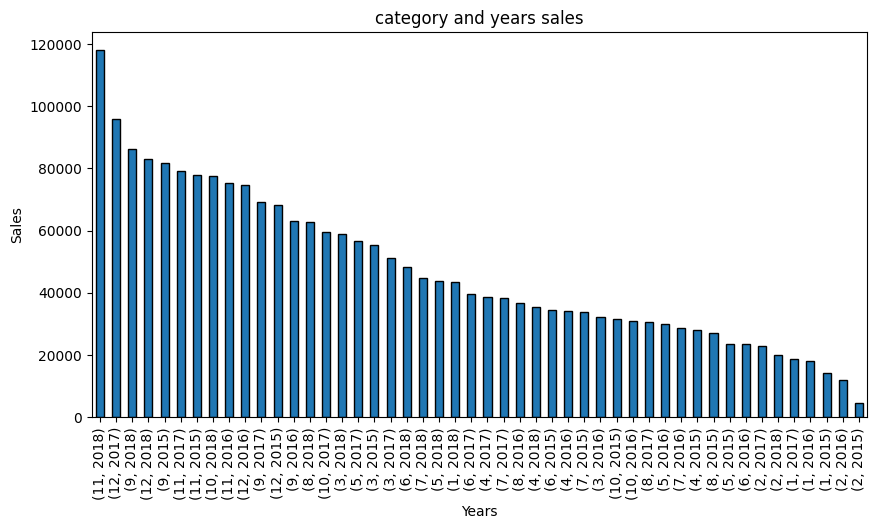

In [18]:
order_ship_year = df.groupby(['Order Month','Order Year'])['Sales'].sum().sort_values(ascending=False)
order_ship_year.plot(kind='bar', figsize=(10, 5), width=0.5, edgecolor='black')
plt.title("category and years sales")
plt.xlabel("Years")
plt.ylabel("Sales")
plt.show()

In [19]:
df.groupby(['Order Month'])['Sales'].sum().sort_values(ascending=False)


Order Month
11    350161.7110
12    321480.1695
9     300103.4117
10    199496.2947
3     197573.5872
8     157315.9270
5     154086.7237
6     145837.5233
7     145535.6890
4     136283.0006
1      94291.6296
2      59371.1154
Name: Sales, dtype: float64

In [20]:
df.groupby(['Order Day'])['Sales'].sum()

Order Day
1      90957.9824
2     103951.1600
3      71788.6906
4      65094.9490
5      64277.0788
6      51099.1360
7      62393.9465
8     100560.3526
9      66582.3650
10     62563.7830
11     68274.3135
12     64819.3662
13     77964.3284
14     70330.9165
15     57091.8050
16     72464.2735
17    111719.9342
18     90587.3005
19     77253.7602
20     69898.6866
21     94842.8728
22     66279.4950
23     88779.6290
24     77146.8530
25     80400.9378
26     73507.6200
27     58700.3251
28     63308.6986
29     44334.4267
30     64858.2714
31     49703.5248
Name: Sales, dtype: float64

In [ ]:
df['Ship Month'] = df['Ship Date'].dt.month
df['Ship Year'] = df['Ship Date'].dt.year
df['Ship Day'] = df['Ship Date'].dt.day

In [43]:
df['Ship Year'].sort_values(ascending=False)
df['Ship Month'].sort_values(ascending=False)
df['Ship Day'].sort_values(ascending=False)


37      31
3167    31
40      31
4733    31
1697    31
        ..
5772     1
5769     1
1049     1
1048     1
3346     1
Name: Ship Day, Length: 9800, dtype: int32

In [ ]:
y = df.groupby(['Ship Day','Ship Month', 'Ship Year'])['Sales'].sum()

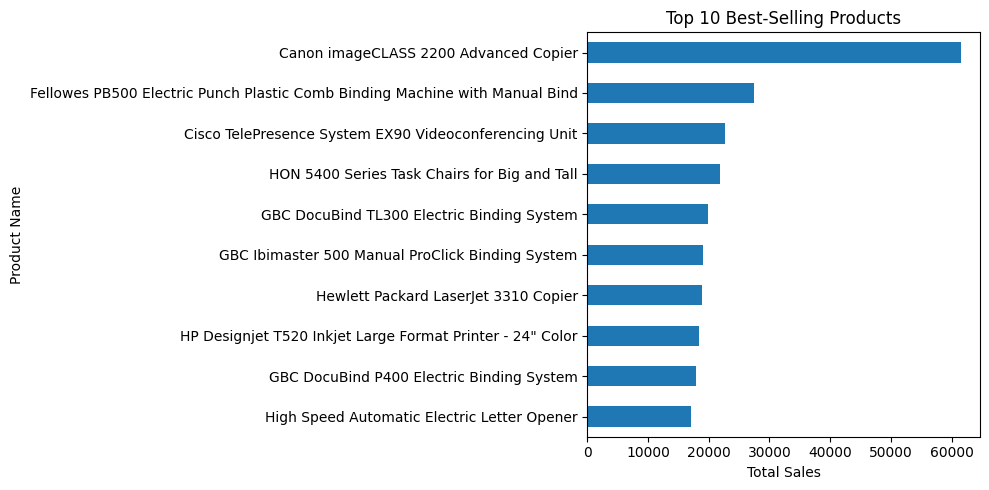

In [68]:
top_products = df.groupby('Product Name',)['Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
top_products.plot(kind='barh')
plt.title("Top 10 Best-Selling Products")
plt.xlabel("Total Sales")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [ ]:
z = df.groupby(['Ship Day','Ship Month', 'Ship Year'])['Product Name']
